#**Car Price Prediction with Machine Learning**


## Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


## Loading Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Oasis/Task2_DS/

/content/drive/MyDrive/Oasis/Task2_DS


In [ ]:
car_csv = pd.read_csv('car data.csv')

## Understanding and cleaning data

In [ ]:
# car_null = car_csv.isnull().sum().sum()
# print("Total number of null values: ",car_null)

# car_csv.head()
car_df = pd.DataFrame(car_csv)
# car_df.head()

print("Total Duplicates Before Removal: ",car_df.duplicated().sum())
car_df.drop_duplicates(inplace=True)
print("Total Duplicates After Removal: ",car_df.duplicated().sum())

# print(car_df.columns)
car_df.head()

Total Duplicates Before Removal:  2
Total Duplicates After Removal:  0


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Overview

In [ ]:
print(car_df.head())
print(car_df.info())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 no

## Visualize Selling Price Distribution

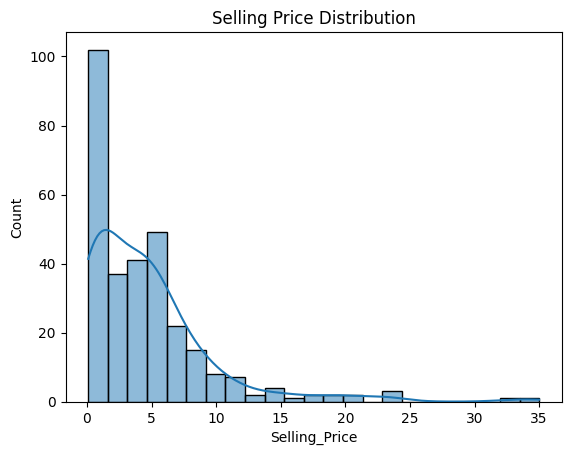

In [ ]:
sns.histplot(car_df['Selling_Price'], kde=True)
plt.title('Selling Price Distribution')
plt.show()


## Correlation Matrix

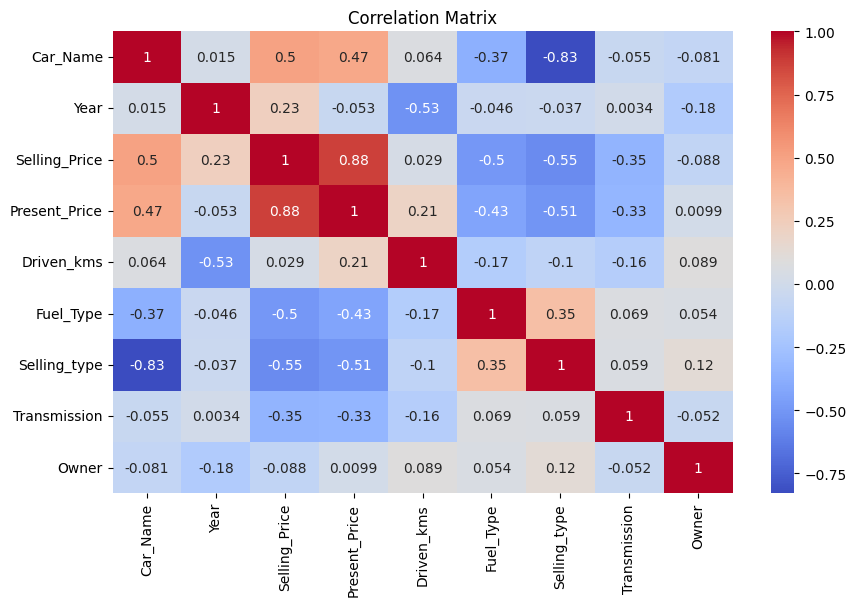

In [ ]:
# Convert 'object' type columns to numerical representation using Label Encoding.
for col in car_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    car_df[col] = le.fit_transform(car_df[col])

plt.figure(figsize=(10, 6))
sns.heatmap(car_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature

In [ ]:
label_encoders = {}
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_cols:
    le = LabelEncoder()
    car_df[col] = le.fit_transform(car_df[col])
    label_encoders[col] = le


## Define Features and Target Variable

In [ ]:
X = car_df.drop(['Car_Name', 'Selling_Price'], axis=1)  # Exclude Car_Name and target variable
y = car_df['Selling_Price']


## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Predictions

In [ ]:
y_pred = model.predict(X_test)


## Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 6.675444100493375
R-squared: 0.7409934356413107


## Visualization of Predictions

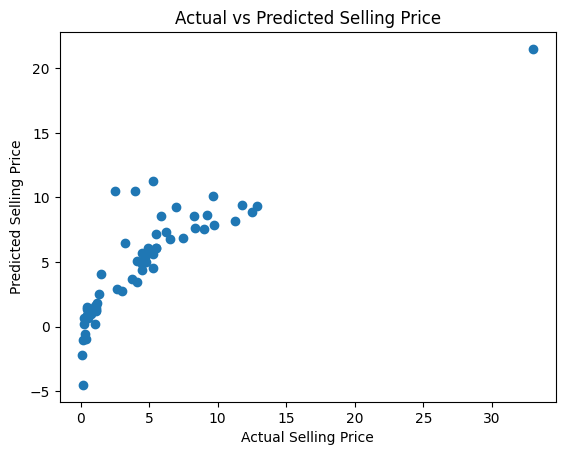

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()


## Author  
### Ishan Rahul Surdi